In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist 

In [ ]:
tf.__version__

'2.8.0'

## Dataset -- MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


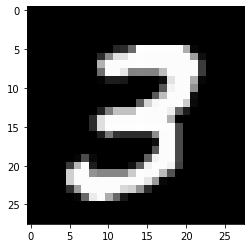

In [ ]:
plt.imshow(x_train[7], cmap="gray")
plt.show()

In [ ]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (60000,)
y_test shape:  (10000,)


In [ ]:
print(y_train[:10])
# 第0到第9

[5 0 4 1 9 2 1 3 1 4]


[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


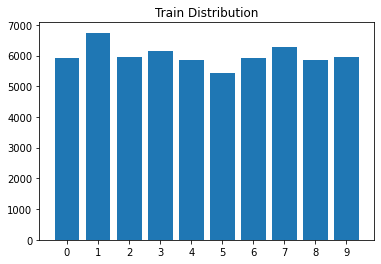

In [ ]:
label, counts = np.unique(y_train, return_counts=True)
print(label)
print(counts)

plt.bar(label, counts, tick_label=label)
plt.title("Train Distribution")
plt.show()

[0 1 2 3 4 5 6 7 8 9]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


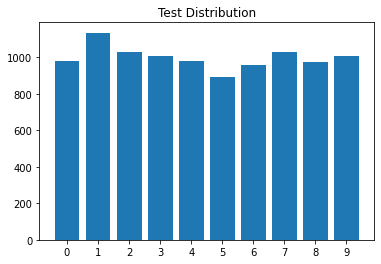

In [ ]:
label, counts = np.unique(y_test, return_counts=True)
print(label)
print(counts)

plt.bar(label, counts, tick_label=label)
plt.title("Test Distribution")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                               test_size=0.2,
                               random_state=2,
                               stratify=y_train)

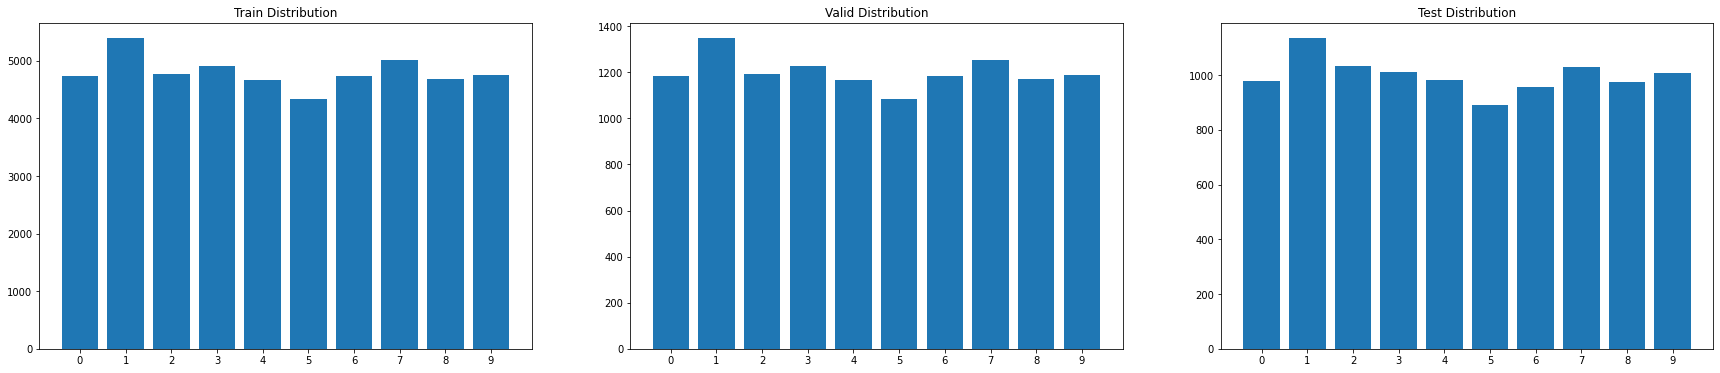

In [ ]:
data_list = [y_train, y_valid, y_test]
data_types = ["Train", "Valid", "Test"]

plt.figure(figsize=(30, 6))
for i in range(3):
  label, counts = np.unique(data_list[i], return_counts=True)

  plt.subplot(1, 3, i+1)
  plt.bar(label, counts, tick_label=label)
  plt.title(data_types[i]+" Distribution")
plt.show()

## Data Preprocessing

In [ ]:
print("x_train type: ", x_train.dtype)
print("x_train max: ", x_train.max())
print("x_train min: ", x_train.min())

x_train type:  uint8
x_train max:  255
x_train min:  0


#### min_max normalization

In [ ]:
x_train = x_train.astype("float32")/255
x_valid = x_valid.astype("float32")/255
x_test = x_test.astype("float32")/255

In [ ]:
print("x_train type: ", x_train.dtype)
print("x_train max: ", x_train.max())
print("x_train min: ", x_train.min())

x_train type:  float32
x_train max:  1.0
x_train min:  0.0


#### Reshape

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (48000, 784)
x_test shape:  (10000, 784)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (48000, 784)
x_test shape:  (10000, 784)


#### Category -- One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_one = to_categorical(y_train)
y_valid_one = to_categorical(y_valid)
y_test_one = to_categorical(y_test)

In [ ]:
print("y_train type: ", y_train.dtype)
print("y_train shape: ", y_train.shape)
print("preprocessing".center(30, "-"))
print("y_train_one type: ", y_train_one.dtype)
print("y_train_one shape: ", y_train_one.shape)

y_train type:  uint8
y_train shape:  (48000,)
--------preprocessing---------
y_train_one type:  float32
y_train_one shape:  (48000, 10)


## Modeling

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
num_classes = y_train_one[0].shape[0]
num_classes

10

In [ ]:
inputs = layers.Input(shape=x_train[0].shape)
x = layers.Dense(64, activation="relu")(inputs) # 第一層64layers

x = layers.Dense(16)(x) # 第二層16layers
x = layers.Activation("relu")(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)


model = Model(inputs=inputs, outputs=outputs) 

In [59]:
inputs = layers.Input(shape=x_test[0].shape)
x = layers.Dense(600, activation="relu")(inputs) # 第一層64layers

x = layers.Dense(20)(x) # 第二層16layers
x = layers.Activation("relu")(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)


model = Model(inputs=inputs, outputs=outputs) 

In [60]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 600)               471000    
                                                                 
 dense_22 (Dense)            (None, 20)                12020     
                                                                 
 activation_7 (Activation)   (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
Total params: 483,230
Trainable params: 483,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_weight = model.variables
# model_weight = model.get_weights()

In [ ]:
# model_weight[0].shape

In [61]:
lr = 0.001
optimizer = optimizers.Adam(lr)
model.compile(loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])

In [62]:
num_epoch = 10 # 疊代跑幾次
batch_size = 64 # GPU效益，2的次方比較合適
history = model.fit(x_train, y_train_one,
            batch_size=batch_size,
            epochs=num_epoch,
            validation_data=(x_valid, y_valid_one))

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2618 - accuracy: 0.9243 - val_loss: 0.1363 - val_accuracy: 0.9587
Epoch 2/10
679/750 [==========================>...] - ETA: 0s - loss: 0.1013 - accuracy: 0.9696

KeyboardInterrupt: ignored

In [63]:
num_epoch = 10 # 疊代跑幾次
batch_size = 64 # GPU效益，2的次方比較合適
history = model.fit(x_test, y_test_one,
            batch_size=batch_size,
            epochs=num_epoch,
            validation_data=(x_valid, y_valid_one))

Epoch 1/10
157/157 [==============================] - 1s 8ms/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.1002 - val_accuracy: 0.9696
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0968 - val_accuracy: 0.9708
Epoch 3/10
157/157 [==============================] - 1s 9ms/step - loss: 0.0264 - accuracy: 0.9935 - val_loss: 0.1017 - val_accuracy: 0.9695
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 0.0128 - accuracy: 0.9983 - val_loss: 0.0945 - val_accuracy: 0.9732
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 0.0077 - accuracy: 0.9992 - val_loss: 0.0981 - val_accuracy: 0.9729
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9727
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9726
Epoch 

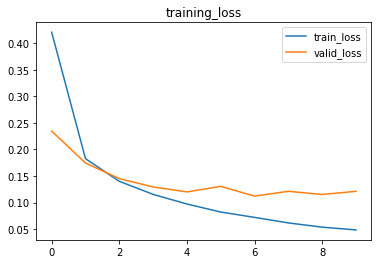

In [ ]:
plt.plot(np.arange(num_epoch), history.history['loss'], label="train_loss")
plt.plot(np.arange(num_epoch), history.history['val_loss'], label="valid_loss")
plt.legend(loc='best')
plt.title('training_loss')
plt.show()

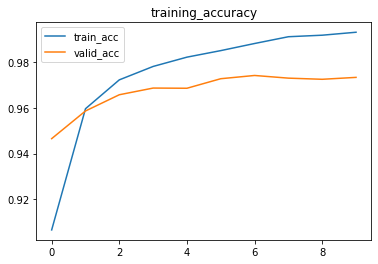

In [ ]:
plt.plot(np.arange(num_epoch), history.history['accuracy'], label="train_acc")
plt.plot(np.arange(num_epoch), history.history['val_accuracy'], label="valid_acc")
plt.legend(loc='best')
plt.title('training_accuracy')
plt.show()

## Prediction

In [ ]:
y_test_predprob = model.predict(x_test)
print(y_test_predprob[:3])

[[1.9942394e-09 7.5747710e-09 4.9928458e-06 2.3212835e-05 3.0291076e-12
  9.0385638e-10 1.3294307e-13 9.9997115e-01 3.2191517e-07 2.9163797e-07]
 [1.2669585e-10 1.4085853e-06 9.9999857e-01 4.3990043e-09 2.0651986e-14
  1.6619395e-10 8.8513389e-12 3.3473548e-15 2.3118877e-08 1.0479086e-13]
 [1.0164098e-10 9.9984229e-01 2.5435853e-05 1.6126171e-07 2.2760107e-08
  1.0301064e-07 1.8625761e-07 1.2285446e-04 8.9703544e-06 8.1171382e-11]]


In [ ]:
y_test_predprob.shape

(10000, 10)

In [ ]:
y_test_pred = y_test_predprob.argmax(-1)
print("y_test_pred shape: ", y_test_pred.shape)
print(y_test_pred[:3])

y_test_pred shape:  (10000,)
[7 2 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(f"accuracy_score: {accuracy_score(y_test, y_test_pred):.3f}")
print("confusion matrix: \n", confusion_matrix(y_test, y_test_pred))

accuracy_score: 0.977
confusion matrix: 
 [[ 962    1    1    1    2    0    4    2    5    2]
 [   0 1123    2    1    0    0    1    1    7    0]
 [   0    1 1018    1    3    0    1    6    2    0]
 [   0    2    8  987    0    1    0    4    4    4]
 [   1    1    4    0  958    0    3    1    2   12]
 [   3    0    1   16    1  858    2    1    6    4]
 [   3    3    4    1    9    7  928    0    3    0]
 [   1    5    9    2    1    0    0 1003    4    3]
 [   2    0    6    7    3    0    1    2  952    1]
 [   1    4    1    7    5    3    0    5    6  977]]


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


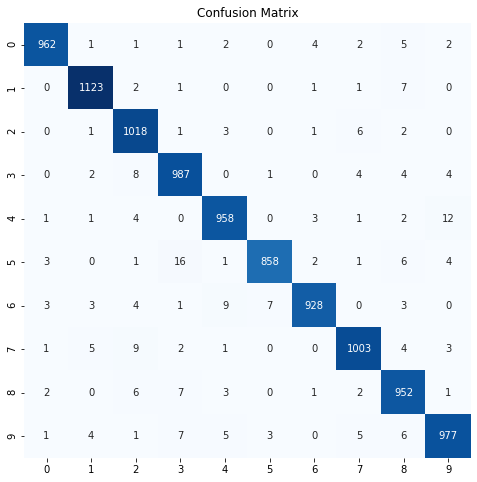

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
      cmap="Blues", annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.show()